In [2]:
import tensorflow as tf

2025-04-16 18:36:11.481848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Generates noisy quadratic data
x = tf.linspace(-2, 2, 201) # Generates 201 points between -2 and 2
x = tf.cast(x, tf.float32) # Converts to float32

# Define the true function (Quadratic function)
def f(x):
  return x**2 + 2*x - 5

y = f(x) + tf.random.normal(shape=[201])  # Adds some noise


This generates input ```x``` values between ```-2 and 2```, computes true ```y = x² + 2x - 5```, then adds noise → simulates a real-world dataset.

Generated Data has 
 input(x) (201,) 
 output(y) (201,)
First 5 data points:
x: [-2.   -1.98 -1.96 -1.94 -1.92]
y: [-5.5012245 -4.0277677 -5.9291034 -5.2572308 -3.7023396]


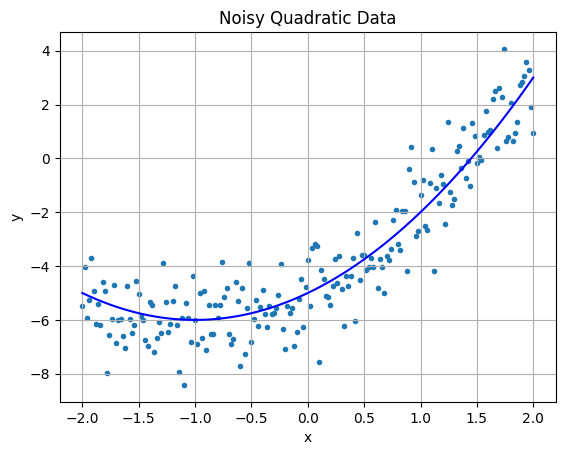

Data points are not on Ground Truth line because of noise (Representing real world data).


In [5]:
print("Generated Data has \n input(x)", x.shape, "\n output(y)", y.shape)
# Print the first 5 data points
print("First 5 data points:")
print("x:", x[:5].numpy())
print("y:", y[:5].numpy())

# Show the data, plotting on scatter plot
import matplotlib.pyplot as plt
plt.scatter(x, y, marker='.')
plt.plot(x, f(x), label='Ground truth', color='blue')
plt.title('Noisy Quadratic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

print("Data points are not on Ground Truth line because of noise (Representing real world data).")



# Define Model and train for above generated data

In [6]:
# Define model
class Model(tf.Module):
  def __init__(self):
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    self.w_q = tf.Variable(rand_init[0])  # quadratic weight
    self.w_l = tf.Variable(rand_init[1])  # linear weight
    self.b = tf.Variable(rand_init[2])    # bias

  # below @tf.function decorator is used to compile the function into a graph
  @tf.function
  def __call__(self, x):
    return self.w_q * x**2 + self.w_l * x + self.b


In [7]:
# Define loss function
# Mean Squared Error (MSE) loss function
# Without this function, model will work as single layer perceptron?
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))


In [8]:
epochs = 10
learning_rate = 0.01
quad_model = Model()

dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=201).batch(32)


for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
      # tf.GradientTape() tracks operations so TensorFlow can compute gradients.
    # Compute gradients
    # of the loss with respect to the model's variables
    # The tape records the operations for automatic differentiation.
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g, v in zip(grads, quad_model.variables):
      v.assign_sub(learning_rate * g)
    # print weights and bias in each epoch
    print("Weights and Bias after epoch", epoch, ": Quadratic weight:", quad_model.w_q.numpy(), \
          "Linear weight:", quad_model.w_l.numpy(), "Bias:", quad_model.b.numpy(), "Batch Loss:", batch_loss.numpy())



Weights and Bias after epoch 0 : Quadratic weight: 1.1335692 Linear weight: 4.3478456 Bias: 4.4968514 Batch Loss: 102.44872
Weights and Bias after epoch 0 : Quadratic weight: 0.8897141 Linear weight: 4.357164 Bias: 4.316833 Batch Loss: 86.90302
Weights and Bias after epoch 0 : Quadratic weight: 0.62877166 Linear weight: 4.2281446 Bias: 4.1158237 Batch Loss: 107.279625
Weights and Bias after epoch 0 : Quadratic weight: 0.37099972 Linear weight: 4.1830688 Bias: 3.9424238 Batch Loss: 84.478325
Weights and Bias after epoch 0 : Quadratic weight: 0.15444669 Linear weight: 4.125376 Bias: 3.7763038 Batch Loss: 76.44665
Weights and Bias after epoch 0 : Quadratic weight: -0.004907936 Linear weight: 4.0490355 Bias: 3.6069188 Batch Loss: 77.78688
Weights and Bias after epoch 0 : Quadratic weight: -0.15482628 Linear weight: 3.9992144 Bias: 3.4659233 Batch Loss: 53.56079
Weights and Bias after epoch 1 : Quadratic weight: -0.35333484 Linear weight: 3.9075072 Bias: 3.3162484 Batch Loss: 61.922283
Weig

2025-04-16 18:39:09.569647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.593488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.617727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.640486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.663075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.685735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:39:09.715729: W tensorflow/core/framework/local_rendezvous.cc:404] L

Weights and Bias after epoch 6 : Quadratic weight: -1.484635 Linear weight: 2.7516174 Bias: 0.4969115 Batch Loss: 15.733231
Weights and Bias after epoch 6 : Quadratic weight: -1.4654804 Linear weight: 2.7303789 Bias: 0.44624516 Batch Loss: 18.70229
Weights and Bias after epoch 6 : Quadratic weight: -1.4566718 Linear weight: 2.7170434 Bias: 0.4042491 Batch Loss: 13.08876
Weights and Bias after epoch 6 : Quadratic weight: -1.4438567 Linear weight: 2.7126272 Bias: 0.3733514 Batch Loss: 11.1262
Weights and Bias after epoch 7 : Quadratic weight: -1.4329398 Linear weight: 2.6950731 Bias: 0.32461038 Batch Loss: 15.287502
Weights and Bias after epoch 7 : Quadratic weight: -1.4130971 Linear weight: 2.6715822 Bias: 0.28971565 Batch Loss: 13.989839
Weights and Bias after epoch 7 : Quadratic weight: -1.3699765 Linear weight: 2.638967 Bias: 0.26042458 Batch Loss: 15.578636
Weights and Bias after epoch 7 : Quadratic weight: -1.3746716 Linear weight: 2.6226285 Bias: 0.20014098 Batch Loss: 16.939987
W

2025-04-16 18:39:09.786831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Final Weights and Bias: Quadratic weight: -1.164127 Linear weight: 2.4620624 Bias: -0.46727556
Final Weights and Bias: Quadratic weight: -1.164127 Linear weight: 2.4620624 Bias: -0.46727556 Final Loss: 10.850511


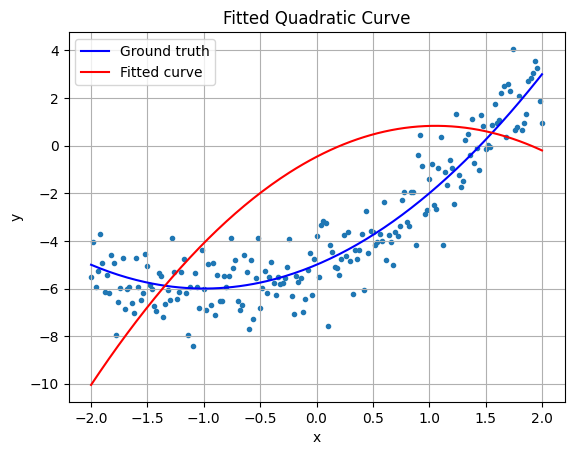

In [11]:
# Print final weights and bias
print("Final Weights and Bias: Quadratic weight:", quad_model.w_q.numpy(), \
      "Linear weight:", quad_model.w_l.numpy(), "Bias:", quad_model.b.numpy())
epoch10_quad_weight = quad_model.w_q.numpy()
epoch10_linear_weight = quad_model.w_l.numpy()
epoch10_bias = quad_model.b.numpy()
epoch_10_final_loss = mse_loss(quad_model(x), y)

# Print final weights and bias
print("Final Weights and Bias: Quadratic weight:", epoch10_quad_weight, \
      "Linear weight:", epoch10_linear_weight, "Bias:", epoch10_bias, \
            "Final Loss:", epoch_10_final_loss.numpy())
# Print final loss
# Plot the fitted curve
plt.scatter(x, y, marker='.')   
plt.plot(x, f(x), label='Ground truth', color='blue')
plt.plot(x, quad_model(x), label='Fitted curve', color='red')
plt.title('Fitted Quadratic Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
# The fitted curve should closely match the ground truth curve


In [12]:
epochs = 1000
learning_rate = 0.01
quad_model = Model()

dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=201).batch(32)


for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
      # tf.GradientTape() tracks operations so TensorFlow can compute gradients.
    # Compute gradients
    # of the loss with respect to the model's variables
    # The tape records the operations for automatic differentiation.
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g, v in zip(grads, quad_model.variables):
      v.assign_sub(learning_rate * g)
    # print weights and bias in each epoch
    # print("Weights and Bias after epoch", epoch, ": Quadratic weight:", quad_model.w_q.numpy(), \
        #   "Linear weight:", quad_model.w_l.numpy(), "Bias:", quad_model.b.numpy(), "Batch Loss:", batch_loss.numpy())



2025-04-16 18:42:11.188171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.210529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.231865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.254678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.275966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.295529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-16 18:42:11.317907: W tensorflow/core/framework/local_rendezvous.cc:404] L

Final Weights and Bias: Quadratic weight: 0.98148596 Linear weight: 2.0867355 Bias: -5.065473
Final Loss: 1.0391158


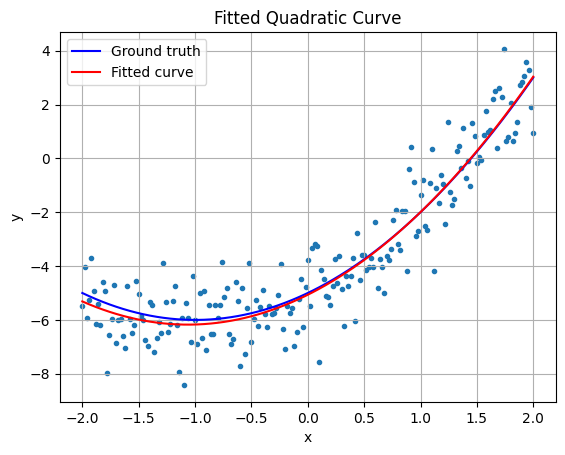

In [13]:
# Print final weights and bias
print("Final Weights and Bias: Quadratic weight:", quad_model.w_q.numpy(), \
      "Linear weight:", quad_model.w_l.numpy(), "Bias:", quad_model.b.numpy())

# Print final loss
final_loss = mse_loss(quad_model(x), y)
print("Final Loss:", final_loss.numpy())
# Plot the fitted curve
plt.scatter(x, y, marker='.')   
plt.plot(x, f(x), label='Ground truth', color='blue')
plt.plot(x, quad_model(x), label='Fitted curve', color='red')
plt.title('Fitted Quadratic Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
# The fitted curve should closely match the ground truth curve

In [14]:
print("The model has learned the quadratic function with noise.")
print("Final weights and bias are close to the true values. weights:", quad_model.w_q.numpy(), \
      "Linear weight:", quad_model.w_l.numpy(), "Bias:", quad_model.b.numpy())
print("Total loss after all epochs", final_loss.numpy())

print("Final Weights and Bias: Quadratic weight:", epoch10_quad_weight, \
      "Linear weight:", epoch10_linear_weight, "Bias:", epoch10_bias, \
            "Final Loss:", epoch_10_final_loss.numpy())

The model has learned the quadratic function with noise.
Final weights and bias are close to the true values. weights: 0.98148596 Linear weight: 2.0867355 Bias: -5.065473
Total loss after all epochs 1.0391158
Final Weights and Bias: Quadratic weight: -1.164127 Linear weight: 2.4620624 Bias: -0.46727556 Final Loss: 10.850511


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Loss using Keras: 1.0196316242218018
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


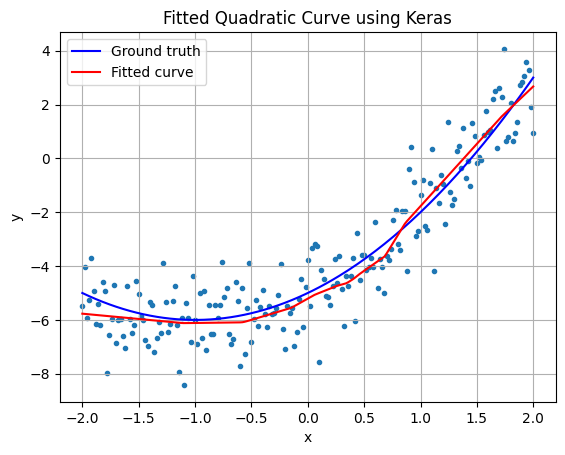

The model has learned the quadratic function with noise.


In [ ]:
# Using dataset train model using Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x, y, epochs=1000, batch_size=32, verbose=0)
# Evaluate the model
loss = model.evaluate(x, y, verbose=0)

print("Final Loss using Keras:", loss)
# Plot the fitted curve
plt.scatter(x, y, marker='.')

plt.plot(x, f(x), label='Ground truth', color='blue')
plt.plot(x, model.predict(x), label='Fitted curve', color='red')
plt.title('Fitted Quadratic Curve using Keras')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.show()
# The fitted curve should closely match the ground truth curve
print("The model has learned the quadratic function with noise.")

